In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import seaborn as sns

In [6]:
# 데이터를 불러온다
df_raw = pd.read_csv("/home/pirl/jeongmee/statistics/data/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [7]:
del df_raw["CUSTOMER_ID"]

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 14 columns):
CHURN                 930 non-null object
GENDER                930 non-null object
AGE                   930 non-null int64
CHARGE_TYPE           930 non-null object
HANDSET               930 non-null object
USAGE_BAND            930 non-null object
SERVICE_DURATION      930 non-null float64
DROPPED_CALLS         930 non-null int64
PEAK_CALLS_NO         930 non-null int64
PEAK_CALLS_TIME       930 non-null float64
WEEKEND_CALLS_NO      930 non-null int64
WEEKEND_CALLS_TIME    930 non-null float64
TOTAL_CALLS_NO        930 non-null int64
TOTAL_CALLS_TIME      930 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 101.8+ KB


In [9]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [10]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# train, validation, test dataset으로 분류한다.
df_raw_x = df_raw_dummy.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["CHURN"]
# 7:3 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                               df_raw_y,
                                                               test_size = 0.3,
                                                               random_state=1234)

In [14]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,0.943527,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,-1.059853,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,0.943527,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424


In [21]:
df_strain_x, df_stest_x = train_test_split(df_scaled,
                                           test_size = 0.3,
                                           random_state=1234)

In [22]:
# scaled model(default)
svm_scaled = GradientBoostingClassifier(random_state=1234)
svm_scaled.fit(df_strain_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_strain_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_stest_x, df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.885


In [27]:
# C
train_accuracy = []; test_accuracy = []

para_c = [10**c for c in range(-2, 2)]

for v_c in para_c:
    svm=SVC(C=v_c, random_state=1234)
    svm.fit(df_strain_x, df_train_y)
    train_accuracy.append(svm.score(df_strain_x, df_train_y))
    test_accuracy.append(svm.score(df_stest_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["validAccuracy"] = test_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,validAccuracy
0,0.01,0.791,0.842
1,0.10,0.799,0.839
2,1.00,0.916,0.907
3,10.00,0.974,0.892


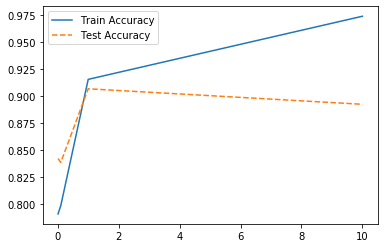

In [28]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [29]:
# Gamma
train_accuracy = []; test_accuracy = []

para_g = [10**g for g in range(-3, 2)]

for v_g in para_g:
    svm=SVC(C=1, gamma=v_g, random_state=1234)
    svm.fit(df_strain_x, df_train_y)
    train_accuracy.append(svm.score(df_strain_x, df_train_y))
    test_accuracy.append(svm.score(df_stest_x, df_test_y))
    
df_accuracy_g = pd.DataFrame()
df_accuracy_g["gamma"] = para_g
df_accuracy_g["TrainAccuracy"] = train_accuracy
df_accuracy_g["validAccuracy"] = test_accuracy
df_accuracy_g.round(3)

,gamma,TrainAccuracy,validAccuracy
0,0.001,0.865,0.882
1,0.010,0.903,0.907
2,0.100,0.957,0.896
3,1.000,0.997,0.842
4,10.000,1.000,0.842


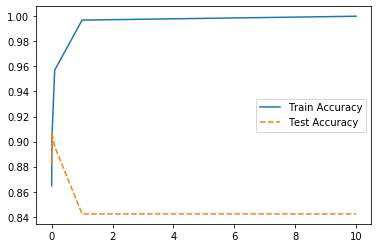

In [30]:
plt.plot(para_g, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_g, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [39]:
# 최종 모델
svm_final = SVC(C=10, gamma=0.01, random_state=1234)
svm_final.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_final.score(df_strain_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_final.score(df_stest_x, df_test_y)))

Accuracy on training set: 0.791
Accuracy on test set: 0.842


In [40]:
y_pred = svm_final.predict(df_stest_x)
print("Accuracy: {:.3f}\n".format(svm_final.score(df_stest_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.842

Confusion matrix: 
[[235   0]
 [ 44   0]]


In [37]:
estimator = SVC(random_state=1234)

param_grid = {"C" : para_c,
             "gamma" : para_g}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_strain_x, df_train_y)
print("best estimator : \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter : \n{}".format(grid_rf.best_params_))
print("\nbest score : \n{}".format(grid_rf.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator : 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter : 
{'C': 10, 'gamma': 0.01}

best score : 
0.897


In [42]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set : {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.820
Accuracy on test set : 0.803


In [43]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
# n_neighbors
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["validAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,neighbors,TrainAccuracy,validAccuracy
0,1,1.000,0.717
1,2,0.851,0.821
2,3,0.843,0.792
3,4,0.825,0.821
4,5,0.820,0.803
5,6,0.822,0.839
6,7,0.819,0.828
7,8,0.806,0.835
8,9,0.810,0.832
9,10,0.805,0.839


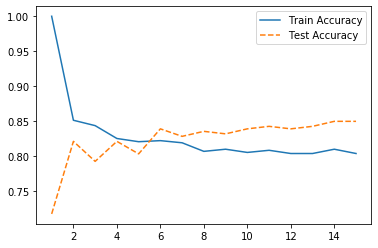

In [47]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [53]:
# n_neighbors
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1, 11)] * 3

para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 +["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.717
1,2,minkowski,0.851,0.821
2,3,minkowski,0.843,0.792
3,4,minkowski,0.825,0.821
4,5,minkowski,0.820,0.803
5,6,minkowski,0.822,0.839
6,7,minkowski,0.819,0.828
7,8,minkowski,0.806,0.835
8,9,minkowski,0.810,0.832
9,10,minkowski,0.805,0.839


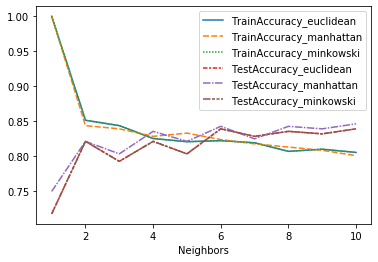

In [56]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns="metric", values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=4, weights="uniform", metric="euclidean")
knn_model.fit(df_train_x, df_train_y)

y_pred = knn_model.predict(df_test_x)

print("Accuracy: {:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.821

Confusion matrix: 
[[227   8]
 [ 42   2]]
